In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import collections
import seaborn as sns
from scipy.sparse import hstack
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('linear_train.txt', header=None)
tst = pd.read_csv('linear_test.txt', header=None)

In [3]:
def feature_fabric(data):
    data['is_first_upper'] = data[0].map(lambda x: (x[0].isupper() and not x.isupper())*1.)
    data['length'] = data[0].map(lambda x: len(x))
    #data[0] = data[0].map(lambda x: x.lower())
    #data['last_'+str(2)+'chars'] = data[0].map(lambda x: x[-2:] if len(x) > 2 else x)
    #for i in np.arange(3, 6):
        #data['last_'+str(i)+'chars'] = data[0].map(lambda x: x[-i:-i+2] if len(x) >= i else x[:2])
    data['counter'] = data[0].map(lambda x: collections.Counter(x))
    data['ap'] = data['counter'].map(lambda x: x['\''])
    data['other'] = data['counter'].map(lambda x: sum([x[' '], x['.'], x[','], x['/'], x['"'], x['·'], x['-']])+sum([x[str(i)] for i in np.arange(10)]))
    data.drop('counter', axis=1, inplace=True)


In [30]:
count_vectorizer = CountVectorizer(min_df=5, max_features=None,ngram_range=(2, 8), analyzer='char_wb', lowercase=False, binary=True) 
X = count_vectorizer.fit_transform(data[0])

In [31]:
X_test = count_vectorizer.transform(tst[0])

In [6]:
feature_fabric(data)
feature_fabric(tst)
olddata = data.copy()
oldtst = tst.copy()

In [6]:
def mksth(a, b):
    data = olddata.copy()
    tst = oldtst.copy()
    active_endings = set(tst[['last_'+str(i)+'chars' for i in np.arange(2, 5)]].as_matrix().reshape(3*len(tst)))
    active_endings = active_endings.intersection(set(data[['last_'+str(i)+'chars' for i in np.arange(2, 5)]].as_matrix().reshape(3*len(data))))

    in_train = collections.Counter(data[['last_'+str(i)+'chars' for i in np.arange(2, 5)]].as_matrix().reshape(3*len(data)))
    in_test = collections.Counter(tst[['last_'+str(i)+'chars' for i in np.arange(2, 5)]].as_matrix().reshape(3*len(tst))) 
    len(active_endings)

    new_active_endings = set()
    for ending in active_endings:
        if in_test[ending] > a and in_train[ending] > b:
            new_active_endings.add(ending)
    len(new_active_endings)

    active_endings = new_active_endings
    for ending in active_endings:
        data[ending] = data['last_2chars'].map(lambda x: (x == ending)*1.) + data['last_3chars'].map(lambda x: (x == ending)*1.) + data['last_4chars'].map(lambda x: (x == ending)*1.)
        tst[ending] = tst['last_2chars'].map(lambda x: (x == ending)*1.) + tst['last_3chars'].map(lambda x: (x == ending)*1.) + tst['last_4chars'].map(lambda x: (x == ending)*1.)
    
        data[ending] =data[ending].map(lambda x: (x > 0)*1.)
        tst[ending] =tst[ending].map(lambda x: (x > 0)*1.)
                    

In [10]:
mksth(10, 50)
#X = data.drop([0, 1, 'last_2chars', 'last_3chars', 'last_4chars', 'last_5chars'], axis=1)
#y = data[1]
#algo = LogisticRegression(penalty='l1', C=0.145, class_weight='balanced')
#results += [cross_val_score(algo, X, y, cv=5, scoring='roc_auc')]

data = olddata.copy()
tst = oldtst.copy()
active_endings = set(tst[['last_'+str(i)+'chars' for i in np.arange(2, 5)]].as_matrix().reshape(3*len(tst)))
active_endings = active_endings.intersection(set(data[['last_'+str(i)+'chars' for i in np.arange(2, 5)]].as_matrix().reshape(3*len(data))))
in_train = collections.Counter(data[['last_'+str(i)+'chars' for i in np.arange(2, 5)]].as_matrix().reshape(3*len(data)))
in_test = collections.Counter(tst[['last_'+str(i)+'chars' for i in np.arange(2, 5)]].as_matrix().reshape(3*len(tst))) 
len(active_endings)

new_active_endings = set()
for ending in active_endings:
    if in_test[ending] > 10 and in_train[ending] > 50:
        new_active_endings.add(ending)
len(new_active_endings)
for ending in active_endings:
    data[ending] = data['last_2chars'].map(lambda x: (x == ending)*1.) + data['last_3chars'].map(lambda x: (x == ending)*1.) + data['last_4chars'].map(lambda x: (x == ending)*1.)
    tst[ending] = tst['last_2chars'].map(lambda x: (x == ending)*1.) + tst['last_3chars'].map(lambda x: (x == ending)*1.) + tst['last_4chars'].map(lambda x: (x == ending)*1.)
    
    data[ending] =data[ending].map(lambda x: (x > 0)*1.)
    tst[ending] =tst[ending].map(lambda x: (x > 0)*1.)

In [42]:
new_X = hstack((X, data.drop([0, 1], axis=1)))#, 'last_2chars', 'last_3chars', 'last_4chars', 'last_5chars'], axis=1)))
#new_X = X.hstack(data.drop([0, 1, 'last_2chars', 'last_3chars', 'last_4chars', 'last_5chars'], axis=1))
X

<101408x126084 sparse matrix of type '<class 'numpy.int64'>'
	with 3362517 stored elements in Compressed Sparse Row format>

In [43]:
new_X_test = hstack((X_test, tst.drop([0, 'y'], axis=1))) #'last_2chars', 'last_3chars', 'last_4chars', 'last_5chars'], axis=1)))
X_test

<188920x126084 sparse matrix of type '<class 'numpy.int64'>'
	with 5994159 stored elements in Compressed Sparse Row format>

In [41]:
tst

,0,is_first_upper,length,ap,other,y
0,Аалто,1.0,5,0,0,0.411848
1,ААР,0.0,3,0,0,0.184019
2,Аара,1.0,4,0,0,0.239469
3,Ааре,1.0,4,0,0,0.112560
4,Аарон,1.0,5,0,0,0.304952
5,Аароне,1.0,6,0,0,0.208425
6,Ааронов,1.0,7,0,0,0.438884
7,Аароном,1.0,7,0,0,0.274790
8,Аароном,1.0,7,0,0,0.274790
9,Аарону,1.0,6,0,0,0.216879


In [ ]:
for i in np.arange(2, 5):
    data['last_'+str(i)+'chars'] = data['last_'+str(i)+'chars'].map(lambda x: x if x in active_endings else '  A')
    tst['last_'+str(i)+'chars'] = tst['last_'+str(i)+'chars'].map(lambda x: x if x in active_endings else '  A')

In [9]:
oldata = data.copy()
data.head()

,0,1,is_first_upper,length,last_2chars,last_3chars,last_4chars,last_5chars,ap,other,...,аё,ьк,рц,чо,яч,аэ,сь,ря,у,йр
0,аалтонен,1,1.0,8,ен,не,он,то,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,аар,0,1.0,3,ар,аа,аа,аа,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,аарон,0,1.0,5,он,ро,ар,аа,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,аарон,0,0.0,5,он,ро,ар,аа,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,аарона,0,1.0,6,на,он,ро,ар,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
encoder1 = LabelEncoder()
encoder1.fit([i for i in active_endings]+['  A'])
for i in np.arange(2, 5):
    data['last_'+str(i)+'chars'] = encoder1.transform(data['last_'+str(i)+'chars'])
    tst['last_'+str(i)+'chars'] = encoder1.transform(tst['last_'+str(i)+'chars'])

In [214]:
encoder = OneHotEncoder(sparse=False)
new_features_train = encoder.fit_transform(data[['last_'+str(i)+'chars' for i in np.arange(2, 5)]])
new_features_test = encoder.transform(tst[['last_'+str(i)+'chars' for i in np.arange(2, 5)]])

In [215]:
new_features_train = pd.DataFrame(new_features_train)
new_features_test = pd.DataFrame(new_features_test)

In [216]:
new_features_train.columns = new_features_test.columns = encoder.active_features_

In [217]:
#for i in np.arange(32):
#    letter = chr(i+ord('а'))
#   new_features_train[letter] = data[letter]
#    new_features_test[letter] = tst[letter]
new_features_train['is_first_upper'] = data['is_first_upper']
new_features_test['is_first_upper'] = tst['is_first_upper']
for i in ['ap', 'other', 'length']:
    new_features_train[i] = data[i]
    new_features_test[i] = tst[i]

In [218]:
new_features_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1203,1204,1205,1206,1207,1208,is_first_upper,ap,other,length
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,6


In [222]:
indx = []
for i in new_features_train.columns:
    if new_features_train[i][1] > 0:
        indx += [i]
print(indx)
print(new_features_train[indx].head(n=30))

[15, 403, 806, 'is_first_upper', 'length']
     15  403  806  is_first_upper  length
0   0.0  0.0  0.0             1.0       8
1   1.0  1.0  1.0             1.0       3
2   0.0  0.0  0.0             1.0       5
3   0.0  0.0  0.0             0.0       5
4   0.0  0.0  0.0             1.0       6
5   0.0  0.0  0.0             1.0       6
6   0.0  0.0  0.0             1.0       6
7   0.0  0.0  0.0             1.0       7
8   0.0  0.0  0.0             1.0       6
9   0.0  0.0  0.0             1.0       7
10  0.0  0.0  0.0             0.0       6
11  0.0  0.0  0.0             0.0       8
12  0.0  0.0  0.0             0.0       7
13  0.0  0.0  0.0             1.0       7
14  0.0  0.0  0.0             0.0       4
15  0.0  0.0  0.0             0.0       7
16  0.0  0.0  0.0             1.0       7
17  0.0  0.0  0.0             0.0       6
18  0.0  0.0  0.0             1.0       8
19  0.0  0.0  0.0             1.0       8
20  0.0  0.0  0.0             1.0      10
21  0.0  0.0  0.0             1.0

In [185]:
oldata.select(lambda x: oldata['last_2chars'][x] == '  A' or oldata['last_3chars'][x] == '  A' or oldata['last_4chars'][x] == '  A' or oldata['last_5chars'][x] == '  A')


,0,1,is_first_upper,length,last_2chars,last_3chars,last_4chars,last_5chars,а,б,...,ш,щ,ъ,ы,ь,э,ю,я,ap,other
1,аар,0,1.0,3,ар,A,A,аа,2,0,...,0,0,0,0,0,0,0,0,0,0
22,абашидзе,1,1.0,8,зе,A,ид,ши,2,1,...,1,0,0,0,0,0,0,0,0,0
24,аббас,1,1.0,5,ас,ба,A,аб,2,2,...,0,0,0,0,0,0,0,0,0,0
25,аббас,1,0.0,5,ас,ба,A,аб,2,2,...,0,0,0,0,0,0,0,0,0,0
48,абдул,0,1.0,5,ул,ду,A,аб,1,1,...,0,0,0,0,0,0,0,0,0,0
72,абзац,0,0.0,5,ац,за,A,аб,2,1,...,0,0,0,0,0,0,0,0,0,0
92,абн,0,0.0,3,A,аб,аб,аб,1,1,...,0,0,0,0,0,0,0,0,0,0
168,абсорбций,0,0.0,9,ий,ци,A,рб,1,2,...,0,0,0,0,0,0,0,0,0,0
199,абхазцы,0,0.0,7,цы,A,аз,ха,2,1,...,0,0,0,1,0,0,0,0,0,0
266,авг,0,1.0,3,A,ав,ав,ав,1,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
new_features_test = new_features_test.drop(0, axis=1)
new_features_train = new_features_train.drop(0, axis=1)

In [275]:
X = data.drop([0, 1, 'last_2chars', 'last_3chars', 'last_4chars', 'last_5chars'], axis=1)
y = data[1]

In [17]:
algo = LogisticRegression(penalty='l1', C=1.)
arr = cross_val_score(algo, X, data[1], cv=5, scoring='roc_auc')
arr

array([ 0.51966029,  0.34112815,  0.23756225,  0.75168307,  0.74895784])

In [26]:
grid = np.linspace(0.1, 10, 10)
results = []
for i in grid:
    algo = LogisticRegression(penalty='l1', C=i, class_weight='balanced')
    results += [cross_val_score(algo, new_X, data[1], cv=3, scoring='roc_auc')]
    print(results[-1])

[ 0.72273663  0.5817991   0.8571674 ]
[ 0.65924204  0.59497291  0.85097005]
[ 0.64898207  0.59833228  0.8444207 ]
[ 0.6455269   0.59966208  0.84043137]
[ 0.64446339  0.59875807  0.83735845]
[ 0.64026634  0.59697499  0.83447016]
[ 0.64309325  0.5941657   0.83249301]
[ 0.64357122  0.5921344   0.83072875]
[ 0.64224498  0.59101595  0.8293686 ]
[ 0.64229296  0.58978667  0.82823651]


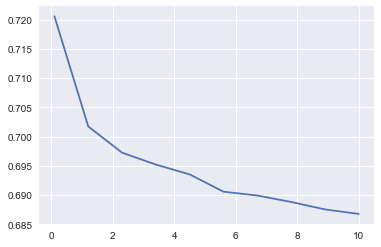

In [27]:
plt.figure()
plt.plot(grid, np.array(results).mean(axis=1))
plt.show()

In [22]:
new_features_train.shape

(101408, 2245)

In [13]:
algo = LogisticRegression(penalty='l1', C=0.145)
arr = cross_val_score(algo, new_X, data[1], cv=2, scoring='roc_auc')
arr

array([ 0.71351796,  0.75617141])

In [44]:
algo = LogisticRegression(penalty='l1', C=.1)
algo.fit(new_X, data[1])

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
X_test = tst.drop([0,'last_2chars', 'last_3chars', 'last_4chars', 'last_5chars'], axis=1)
target = algo.predict_proba(X_test)
target1 = algo.predict(X_test)
target2 = algo.predict_log_proba(X_test)

In [45]:
tst['y'] = algo.predict_proba(new_X_test).transpose()[1]

In [38]:
new_X

<101408x126088 sparse matrix of type '<class 'numpy.float64'>'
	with 3501226 stored elements in COOrdinate format>

In [47]:
answer = pd.read_csv('linear_ans_example.txt')
answer['Answer'] = tst['y']
answer.to_csv("submission.tsv", sep=',', index=False)

In [46]:
tst

,0,is_first_upper,length,ap,other,y
0,Аалто,1.0,5,0,0,0.333397
1,ААР,0.0,3,0,0,0.220762
2,Аара,1.0,4,0,0,0.327404
3,Ааре,1.0,4,0,0,0.225488
4,Аарон,1.0,5,0,0,0.333891
5,Аароне,1.0,6,0,0,0.180612
6,Ааронов,1.0,7,0,0,0.391042
7,Аароном,1.0,7,0,0,0.290430
8,Аароном,1.0,7,0,0,0.290430
9,Аарону,1.0,6,0,0,0.297041
